In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
from netCDF4 import Dataset

In [4]:
dir_therm = '/gws/nopw/j04/paracon_rdg/users/apower/LES_analysis/20m_cloud_thermal/'
dir_data = '/gws/nopw/j04/paracon_rdg/users/apower/LES_analysis/20m_update_subfilt/BOMEX_m0020_g0800_all_14400_gaussian_filter_profiles_'
dir_data = '/gws/nopw/j04/paracon_rdg/users/toddj/updates_suite/BOMEX_m0020_g0800/diagnostic_files/BOMEX_m0020_g0800_all_14400.nc'

In [5]:
data_in = Dataset(dir_data, mode='r')
print(data_in.ncattrs())

['title', 'created', 'MONC time', 'MONC timestep', 'Diagnostic write frequency', 'Previous diagnostic write at']


In [3]:
data_2D = xr.open_dataset(dir_data + '2D.nc')
data_4D = xr.open_dataset(dir_data + '4D.nc')

Cs_2 = data_2D['Cs_prof'].data[0, ...]
Cs_4 = data_4D['Cs_prof'].data[0, ...]

In [8]:
z = np.arange(0, 3020, 20)

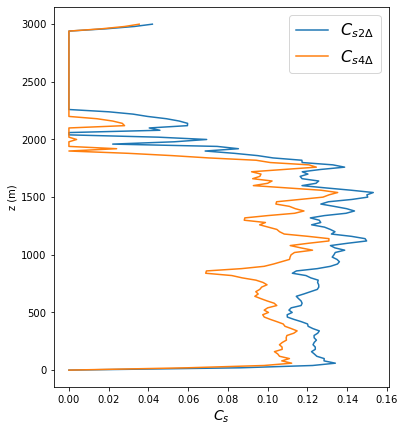

In [9]:
plt.figure(figsize=(6,7))
plt.plot(Cs_2, z, label = '$C_{s 2 \\Delta}$')
plt.plot(Cs_4, z, label = '$C_{s 4 \\Delta}$')
plt.xlabel('$C_{s}$', fontsize=14)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig('plots/Cs_prof.png')

In [10]:
Cs_sq_2 = data_2D['Cs_sq_prof'].data[0, ...]
Cs_sq_4 = data_4D['Cs_sq_prof'].data[0, ...]

In [11]:
Cs_sq_field_2 = data_2D['Cs_sq_field'].data[0, ...]
Cs_sq_field_4 = data_4D['Cs_sq_field'].data[0, ...]

In [12]:
def beta_calc(C_2D_sq_in, C_4D_sq_in):
    
    Cs_2D_sq_copy1 = C_2D_sq_in.copy()
    Cs_2D_sq_copy2 = C_2D_sq_in.copy()
    Cs_4D_sq_copy = C_4D_sq_in.copy()
    
    Cs_2D_sq_copy2[Cs_2D_sq_copy1==0.00000] = 1
    Cs_4D_sq_copy[Cs_2D_sq_copy1==0.00000] = 500 #remain as scale dependant
    
    beta = Cs_4D_sq_copy/Cs_2D_sq_copy2
    beta[beta < 0.125] = 0.125
    #beta[beta > 5] = 5
    
    return beta

In [13]:
beta = beta_calc(Cs_sq_2, Cs_sq_4)

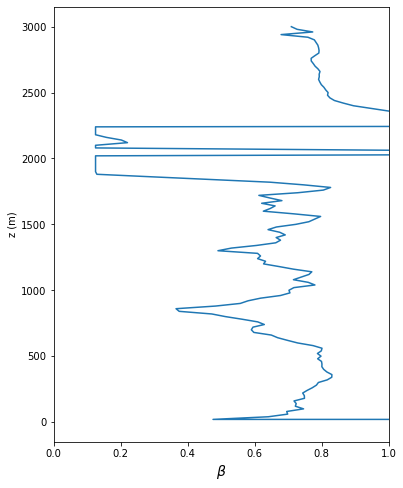

In [14]:
plt.figure(figsize=(6,8))
plt.plot(beta, z)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel("z (m)")
plt.xlim(0, 1)
plt.savefig('plots/beta_prof_zoom.png')

In [15]:
Cs_beta_sq = Cs_sq_2/beta

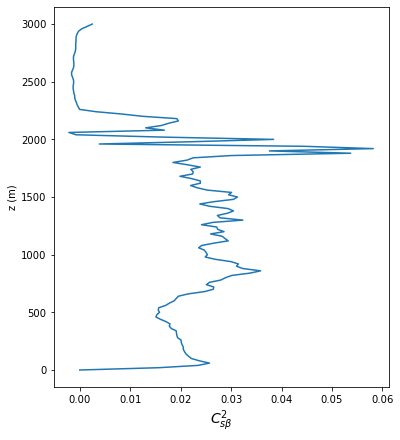

In [16]:
plt.figure(figsize=(6,7))
plt.plot(Cs_beta_sq, z)
plt.xlabel('$C_{s \\beta} ^2$', fontsize=14)
plt.ylabel("z (m)")
#plt.xlim(1, 3)
plt.savefig('plots/Cs_beta_sq_prof.png')

In [17]:
def get_Cs(Cs_sq):
    """ calculates C_s from C_s^2 by setting neg values to zero
    and sq rooting"""

    Cs_sq_copy = Cs_sq.copy()
    Cs_sq_copy[Cs_sq < 0] = 0
    Cs = np.sqrt(Cs_sq_copy)

    return Cs

In [18]:
Cs_beta = get_Cs(Cs_beta_sq)

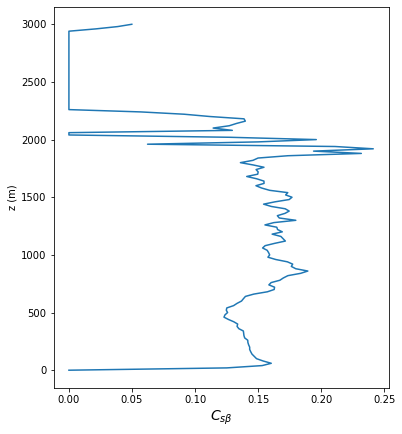

In [19]:
plt.figure(figsize=(6,7))
plt.plot(Cs_beta, z)
plt.xlabel('$C_{s \\beta}$', fontsize=14)
plt.ylabel("z (m)")
#plt.xlim(1, 3)
plt.savefig('plots/Cs_beta_prof.png')

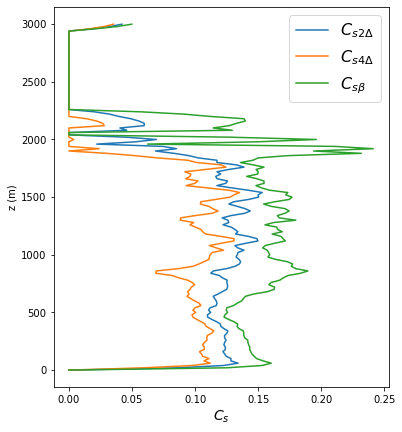

In [20]:
plt.figure(figsize=(6,7))
plt.plot(Cs_2, z, label = '$C_{s 2 \\Delta}$')
plt.plot(Cs_4, z, label = '$C_{s 4 \\Delta}$')
plt.plot(Cs_beta, z, label = '$C_{s \\beta}$')
plt.xlabel('$C_{s}$', fontsize=14)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig('plots/Cs_prof_w_beta.png')

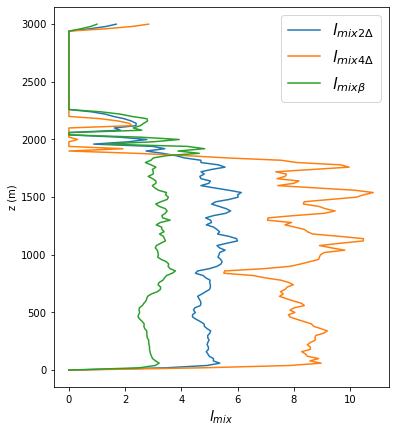

In [21]:
plt.figure(figsize=(6,7))
plt.plot(Cs_2*(40), z, label = '$l_{mix 2 \\Delta}$')
plt.plot(Cs_4*(80), z, label = '$l_{mix 4 \\Delta}$')
plt.plot(Cs_beta*(20), z, label = '$l_{mix \\beta}$')
plt.xlabel('$l_{mix}$', fontsize=14)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig('plots/l_mix.png')

In [22]:
def l_mix_MONC(Cs, Delta, z_in, k=0.4):

    l_mix = np.sqrt( 1 / ( (1/(Cs*Cs * Delta*Delta)) + (1/(k*k * z_in*z_in)) ) )

    return l_mix

In [23]:
monc_l_20 = l_mix_MONC(0.23, 20, z, k=0.4)
monc_l_40 = l_mix_MONC(0.23, 40, z, k=0.4)
monc_l_80 = l_mix_MONC(0.23, 80, z, k=0.4)

/tmp/ipykernel_1449/467188955.py:3: RuntimeWarning: divide by zero encountered in true_divide
  l_mix = np.sqrt( 1 / ( (1/(Cs*Cs * Delta*Delta)) + (1/(k*k * z_in*z_in)) ) )


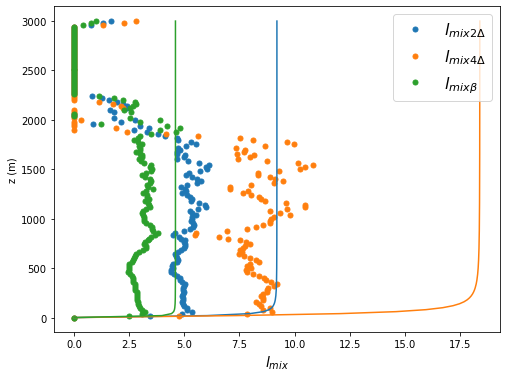

In [26]:
plt.figure(figsize=(8,6))
plt.plot(Cs_2*(40), z, '.', markersize = 10, label = '$l_{mix 2 \\Delta}$')
plt.plot(Cs_4*(80), z, '.', markersize = 10, label = '$l_{mix 4 \\Delta}$')
plt.plot(Cs_beta*(20), z, '.', markersize = 10, label = '$l_{mix \\beta}$')

plt.plot(monc_l_40, z, 'tab:blue')
plt.plot(monc_l_80, z, 'tab:orange')
plt.plot(monc_l_20, z, 'tab:green')

plt.xlabel('$l_{mix}$', fontsize=14)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig('plots/l_mix_w_MONC.png')

In [ ]:
plt.figure(figsize=(8,4))

levels1 = np.linspace(0,0.4,5)
cm1 = plt.contourf(np.transpose(cs_2D[:,y,:]), levels1, extend='both')
cb1 = plt.colorbar(cm1)
plt.xlabel('x')
plt.ylabel("z")
plt.title(f'$C_s$ 2D at y = {y}')
cb1.set_label(f"$C_s$", size=12)
plt.savefig(f"plots/Cs_2D_y={y}.png")